<a href="https://colab.research.google.com/github/toche7/DSEssentials/blob/Solution/Lab7_Model_Selection_STD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab. 7 Model Development

ขั้นตอนในการทำพัฒนาแบบจำลองสามารถแบ่งได้ 2 ขั้นตอนดังนี้

1. ขั้นตอนการประเมินแบบจำลอง \(Model Validation\)
2. ขั้นตอนการคัดเลือกแบบจำลอง \(Model Selection\)



## 7.1 Model Validation

ในการประเมินแบบจำลอง หมายถึงกระบวนการในการวัดประสิทธิภาพของแบบจำลอง เพื่อที่จะใช้ในกระบวนการคัดเลือกหรือเปรียบเทียบประสิทธิภาพระหว่างแบบจำลองซึ่งสามารถทำได้สองวิธีดังนี้

1. Hold\-Out Method
2. Cross\-Validation Method

https://scikit-learn.org/stable/modules/cross_validation.html


### 7.1.1 Hold\-Out Method



![](https://miro.medium.com/v2/resize:fit:720/format:webp/1*iZpmWiVeFn0bcuMZ_yiEdw.jpeg)


Theory

https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

Library

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#




```python
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

```




ตัวแปรสำคัญในการใช้คำสั่ง
* *arrarys: ข้อมูลที่ใช้ในการแบ่งสามารถใส่เข้ามาหลายๆ ชุดพร้อมกัน ได้
* test_size: float หรือ int, default = None, ถ้าเป็น 0.0-1 ก็จะทำการแบ่งข้อมูลไปตามขนาดสัดส่วนของ test_size และส่วนที่เหลือจะไปเป็น train set ถ้าเป็นจำนวนเต็มก็จะหมายถึงค่าจำนวนข้อมูลที่จะแบ่งไป   แต่ถ้าเป็น None ก็จะกำหนดให้กำหนดเป็น 0.25
* train_size: float หรือ int, default = None, จะเป็นข้อมูลส่วนจะนำไปฝึกแบบจำลอง โดยจะเป็นแบ่งตามค่า float ที่กำหนด ถ้าเป็นเลขจำนวนเต็มก็จะกำหนดค่าตามนั้น ถ้าเป็น none ก็จะใช้ส่วนที่เหลือจาก test set มาใช้
* random_state: int, default = None, กำหนดค่า seed ให้กับตัวกำสร้าง random โดยค่านี้จะถูกใช้ในการทำ  shuffle ข้อมูลที่จะทำก่อนการแบ่ง


โดยจะส่งค่ากลับมา list ที่แบ่งออกเป็นสองส่วนแล้ว

### Example 1

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split


In [ ]:
X = np.arange(20).reshape((10, 2))
y = range(10)
X

In [11]:
X = np.arange(20).reshape((-1, 2))

In [15]:
y = np.arange(10)
y

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size=0.3, random_state= 0)

In [29]:
X

array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11],
       [12, 13],
       [14, 15],
       [16, 17],
       [18, 19]])

In [30]:
X_train

array([[18, 19],
       [ 2,  3],
       [12, 13],
       [14, 15],
       [ 6,  7],
       [ 0,  1],
       [10, 11]])

In [31]:
X_test

array([[ 4,  5],
       [16, 17],
       [ 8,  9]])

### Example 2

* "from" จะให้กำหนดเป้าหมายในการดึง module ออกมา
* "import" เป็นนำเข้า module เข้ามา จะดึงมาได้เฉพาะที่เป็น module (file) เท่านั้น
* "as" เป็นการตั้งชื่อเล่น เพื่อจะเรียกให้ง่ายขึ้น
* "import module_y "from" func_x "import"  จะดึงมาได้บางส่วนของ module


``` python
import sklearn as sk
from sklearn.model_selection import train_test_split as tt
```



In [32]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [33]:
from sklearn.svm import SVC

In [34]:
X, y = datasets.load_iris(return_X_y=True)
X.shape, y.shape

((150, 4), (150,))

In [35]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [36]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)


In [38]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((105, 4), (105,), (45, 4), (45,))

In [39]:
clf = SVC(kernel='linear', C=1)
clf.fit(X_train, y_train)
Acc = clf.score(X_test, y_test)

print('size X_train: ', X_train.shape)
print('size X_test: ', X_test.shape)
print('Acc: %.4f' % Acc )

size X_train:  (105, 4)
size X_test:  (45, 4)
Acc: 0.9778


#### ผลกระทบของการ random state และขนาดของการแบ่งข้อมูล

In [40]:
n = 10
size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = size, random_state=0)
print('size X_train: ', X_train.shape)
print('size X_test: ', X_test.shape)
for i in range(1,n):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = size, random_state=0)
  clf = SVC(kernel='linear', C=1).fit(X_train, y_train)
  Acc = clf.score(X_test, y_test)
  print('Acc: %.4f' % Acc )


size X_train:  (105, 4)
size X_test:  (45, 4)
Acc: 0.9778
Acc: 0.9778
Acc: 0.9778
Acc: 0.9778
Acc: 0.9778
Acc: 0.9778
Acc: 0.9778
Acc: 0.9778
Acc: 0.9778


#### ทดลอง
ทดลองปรับค่า random_state = None

In [41]:
n = 10
size = 0.3
for i in range(1,n):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = size, random_state=None)
  clf = SVC(kernel='linear', C=1).fit(X_train, y_train)
  Acc = clf.score(X_test, y_test)
  print('Acc: %.4f' % Acc )

Acc: 0.9556
Acc: 0.9778
Acc: 1.0000
Acc: 0.9556
Acc: 0.9556
Acc: 0.9333
Acc: 0.9778
Acc: 0.9333
Acc: 0.9556


#### ทดลอง
ทดลองปรับค่า  test_size ไปเป็น ค่าอื่น เช่น 0.3, 0.2, 0.1

In [45]:
n = 10
size = 0.1
for i in range(1,n):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = size, random_state=0)
  clf = SVC(kernel='linear', C=1).fit(X_train, y_train)
  Acc = clf.score(X_test, y_test)
  print('Acc: %.4f' % Acc )

Acc: 1.0000
Acc: 1.0000
Acc: 1.0000
Acc: 1.0000
Acc: 1.0000
Acc: 1.0000
Acc: 1.0000
Acc: 1.0000
Acc: 1.0000


### 7.1.2 Cross\-Validation Method



![](https://www.section.io/engineering-education/how-to-implement-k-fold-cross-validation/5-fold-cv.jpeg)


Theory

https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

Library

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html




``` python
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modelObject, X, y, cv= 5, scoring = 'f1_macro')
```



ตัวแปรแบบที่สำคัญ
* modelObject คือตัว object ของ model ที่จะใช้ในการประเมิน
* X,y คือชุดข้อมูลที่จะทำการประเมิน
* cv คือจำนวนการแบ่งข้อมูลที่จะทำการ cross validation
* scoring คือค่าการวัดที่จะทำการตรวจสอบด้วย cross validatoin โดยสามารถดูได้จาก  https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

### Example 3

In [46]:
from sklearn.model_selection import cross_val_score
clf = SVC(kernel='linear', C=1, random_state=42)


In [53]:
scores = cross_val_score(clf, X, y, cv=5)
scores

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [54]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.98 accuracy with a standard deviation of 0.02


ทดลองเปลี่ยนค่า scoring

In [55]:
scores = cross_val_score(clf, X, y, cv=10, scoring='f1_macro')  # defined the score types
scores.mean()

np.float64(0.9726430976430975)

#### ทดลอง
ทดลองปรับค่า fold  (cv) ไปเป็น 10 fold ให้  score เป็น ‘precision’  แบบ  micro average แล้วทำการวัดผลอีกครั้ง

https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [56]:
scores = cross_val_score(clf, X, y, cv=10, scoring='precision_micro')  # defined the score types
scores.mean()

np.float64(0.9733333333333334)

โดยหลักการแล้วนั้น  Cross\-Validation จะให้ความน่าเชื่อถือมากกว่าการใช้ Hold\-Out Method  ส่วนวิธีการ Hold\-Out Method ก็จะมีข้อดีในเรื่องของความเร็วในการประมวลผล โดยส่วนใหญ่แล้วถ้าการทดสอบไหนที่แบบจำลองมีขนาดใหญ่ หรือปริมาณข้อมูลขนาดใหญ่เราจะนิยมใช้เป็น Hold\-Out Method เช่นงานทางด้าน image processing และ  NLP เป็นต้น  ส่วนการทดลองใดที่สามารถทำได้เร็วก็จะนิยมทำด้วยวิธี Cross\-Validation



## 7.2 Model Selection

ในข้อมูลชุดหนึ่งนั้นเราสามารถที่จะสร้างแบบจำลองได้หลายประเภท โดยในแต่ละประเภทเราสามารถสร้างแบบจำลองที่แตกต่างด้วยการปรับพารามิเตอร์ที่เกี่ยวข้องให้แตกต่างกันออกไป สิ่งที่ได้ก็คือเราจะได้โมเดลที่มีประสิทธิภาพแตกต่างกันหลังจากนั้นเราจะเลือกเอาโมเดลที่มีประสิทธิภาพมากที่สุดไปใช้งาน

Hyperparameter Turing หมายถึงกระบวนการปรับพารามิเตอร์ที่เกี่ยวข้องเพื่อให้ได้ประสิทธิภาพมากที่สุด โดยจะต้องมีการทดสอบพารามิเตอร์ที่แตกต่างกันแล้วเอาค่าที่ดีที่สุดไปใช้งาน

https://scikit-learn.org/stable/modules/grid_search.html

การเลือกแบบจำลองนอกจากจะเลือกจากแบบจำลองชนิดเดียวกันแล้วเรายังจะต้องเปรียบเทียบแบบจำลองที่เป็นคนละชนิดกันโดยจะเปรียบเทียบแบบจำลองที่แตกต่างกันที่มีการเลือกพารามิเตอร์ที่ดีที่สุดออกมาแล้ว

Theory

https://scikit-learn.org/stable/modules/grid_search.html#grid-search


Library

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV





```python
from sklearn.model_selection import GridSearchCV
gridSearch = GridSearchCV(modelObject, parameters, cv = 5)
gridSearch.fit(X, y)

```



| Method | Description |
| :------------ | :---------------------------------------------------------- |
| fit\(X, y \) | Fit the model according to the given training data. |


ตัวแปรแบบที่สำคัญ
* modelObject คือตัว object ของ model ที่จะใช้ในการประเมิน
* X,y คือชุดข้อมูลที่จะทำการประเมิน
* cv คือจำนวนการแบ่งข้อมูลที่จะทำการ cross validation
* scoring คือค่าการวัดที่จะทำการตรวจสอบด้วย cross
* parameters เป็น dictionary ของตัวแปรที่จะนำไปทำการค้นหา

### Example 4
Grid Search Cross-Validation with Support Vector Machine

In [57]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
X,y = datasets.load_iris(return_X_y=True)

In [58]:
parameters = {'kernel':['linear', 'rbf'], 'C':[1,2,3,4]}

svc = SVC()

In [59]:
gS = GridSearchCV(svc, parameters, cv = 5, scoring =  None)
gS.fit(X, y)
sorted(gS.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [60]:
gS.cv_results_

{'mean_fit_time': array([0.00142179, 0.00130386, 0.00116272, 0.00140338, 0.00174613,
        0.00164175, 0.00110788, 0.00125146]),
 'std_fit_time': array([4.33257417e-04, 5.10717751e-05, 6.00991526e-05, 2.80195105e-04,
        6.70795492e-05, 3.43421849e-04, 2.83625532e-05, 1.24381673e-04]),
 'mean_score_time': array([0.00097241, 0.00095468, 0.00083327, 0.00105219, 0.00124307,
        0.00106149, 0.00082154, 0.00088482]),
 'std_score_time': array([1.76810717e-04, 1.35283534e-04, 2.34145981e-05, 2.38756722e-04,
        2.28017925e-05, 1.77237132e-04, 1.49672188e-05, 4.05853694e-05]),
 'param_C': masked_array(data=[1, 1, 2, 2, 3, 3, 4, 4],
              mask=[False, False, False, False, False, False, False, False],
        fill_value=999999),
 'param_kernel': masked_array(data=['linear', 'rbf', 'linear', 'rbf', 'linear', 'rbf',
                    'linear', 'rbf'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value=np.str_('?'),
             d

In [63]:
gS.cv_results_['mean_test_score']

array([0.98      , 0.96666667, 0.98      , 0.98      , 0.97333333,
       0.98      , 0.97333333, 0.98      ])

In [61]:
gS.cv_results_['rank_test_score']

array([1, 8, 1, 1, 6, 1, 6, 1], dtype=int32)

In [65]:
gS.best_estimator_

SVC(C=1, kernel='linear')

In [64]:
gS.best_score_

np.float64(0.9800000000000001)

In [66]:
gS.best_params_

{'C': 1, 'kernel': 'linear'}

In [67]:
gS.best_estimator_.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [68]:
gS.best_estimator_.score(X,y)

0.9933333333333333

In [69]:
import matplotlib.pyplot as plt
import numpy as np

(0.9, 1.0)

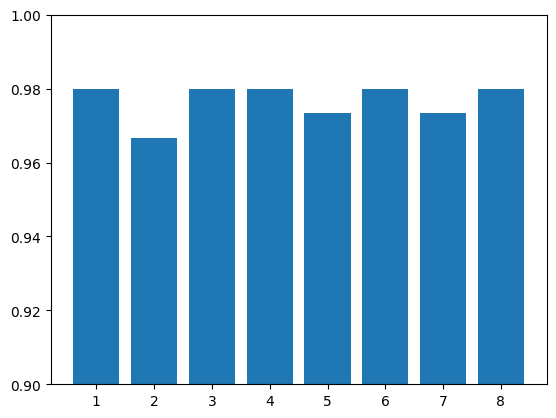

In [70]:
plt.bar(np.arange(1,9), gS.cv_results_['mean_test_score'])
plt.ylim(0.9, 1)

In [71]:
gS.cv_results_['params']

[{'C': 1, 'kernel': 'linear'},
 {'C': 1, 'kernel': 'rbf'},
 {'C': 2, 'kernel': 'linear'},
 {'C': 2, 'kernel': 'rbf'},
 {'C': 3, 'kernel': 'linear'},
 {'C': 3, 'kernel': 'rbf'},
 {'C': 4, 'kernel': 'linear'},
 {'C': 4, 'kernel': 'rbf'}]

## Example 5

Grid Search Cross-Validation with Decision Tree Model

In [72]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
X,y = datasets.load_iris(return_X_y= True)


In [73]:
parameters = {'criterion':['gini', 'entropy', 'log_loss'], 'max_depth':[2,3,4,5,6,7,8,9,10]}
mTree =  DecisionTreeClassifier()

In [74]:
gS = GridSearchCV(mTree, parameters, cv = 5)

In [75]:
gS.fit(X,y)
# sorted(gS.cv_results_.keys())

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [76]:
gS.cv_results_['mean_test_score']

array([0.93333333, 0.96      , 0.96666667, 0.96      , 0.96666667,
       0.96666667, 0.96      , 0.96      , 0.95333333, 0.93333333,
       0.96      , 0.95333333, 0.95333333, 0.95333333, 0.95333333,
       0.96      , 0.95333333, 0.96      , 0.93333333, 0.96      ,
       0.95333333, 0.95333333, 0.95333333, 0.95333333, 0.95333333,
       0.95333333, 0.95333333])

In [77]:
gS.best_estimator_

DecisionTreeClassifier(max_depth=4)

In [78]:
gS.best_params_

{'criterion': 'gini', 'max_depth': 4}

In [79]:
gS.cv_results_['params']

[{'criterion': 'gini', 'max_depth': 2},
 {'criterion': 'gini', 'max_depth': 3},
 {'criterion': 'gini', 'max_depth': 4},
 {'criterion': 'gini', 'max_depth': 5},
 {'criterion': 'gini', 'max_depth': 6},
 {'criterion': 'gini', 'max_depth': 7},
 {'criterion': 'gini', 'max_depth': 8},
 {'criterion': 'gini', 'max_depth': 9},
 {'criterion': 'gini', 'max_depth': 10},
 {'criterion': 'entropy', 'max_depth': 2},
 {'criterion': 'entropy', 'max_depth': 3},
 {'criterion': 'entropy', 'max_depth': 4},
 {'criterion': 'entropy', 'max_depth': 5},
 {'criterion': 'entropy', 'max_depth': 6},
 {'criterion': 'entropy', 'max_depth': 7},
 {'criterion': 'entropy', 'max_depth': 8},
 {'criterion': 'entropy', 'max_depth': 9},
 {'criterion': 'entropy', 'max_depth': 10},
 {'criterion': 'log_loss', 'max_depth': 2},
 {'criterion': 'log_loss', 'max_depth': 3},
 {'criterion': 'log_loss', 'max_depth': 4},
 {'criterion': 'log_loss', 'max_depth': 5},
 {'criterion': 'log_loss', 'max_depth': 6},
 {'criterion': 'log_loss', 'max

In [80]:
gS.cv_results_['rank_test_score']

array([25,  9,  1,  4,  1,  1,  4,  4, 12, 25,  9, 12, 12, 12, 12,  4, 12,
        4, 25,  9, 12, 12, 12, 12, 12, 12, 12], dtype=int32)

(0.9, 1.0)

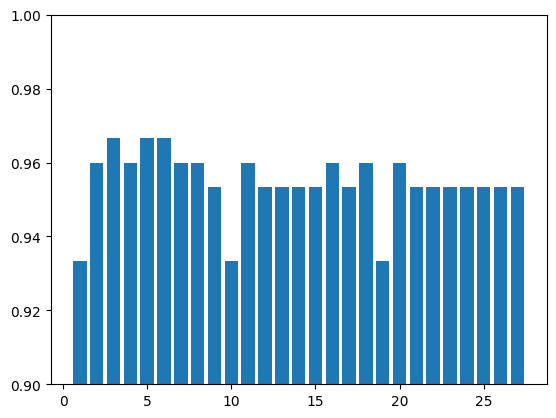

In [81]:
import matplotlib.pyplot as plt
plt.bar(np.arange(1,28), gS.cv_results_['mean_test_score'])
plt.ylim(0.9, 1)

In [82]:
gS.best_estimator_

DecisionTreeClassifier(max_depth=4)

In [83]:
gS.best_params_

{'criterion': 'gini', 'max_depth': 4}

In [84]:
gS.best_score_

np.float64(0.9666666666666668)

In [85]:
gS.best_estimator_.score(X,y)

0.9933333333333333

In [ ]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
X,y = datasets.load_iris(return_X_y= True)


In [ ]:
y

In [ ]:
dt = DecisionTreeClassifier( )

In [ ]:
prameter = {'criterion' : ["gini", "entropy", "log_loss"], 'max_depth': [1,2,3,4,5]}

In [ ]:
gG = GridSearchCV(dt,prameter)

In [ ]:
#gG.fit(X,y)

In [ ]:
#gG.best_params_

In [ ]:
#gG.best_score_

In [ ]:
#gG.cv_results_

In [ ]:
#gG.best_estimator_.score(X,y)

Test KNN Model

In [86]:
from sklearn.neighbors import KNeighborsClassifier

In [87]:
kNN = KNeighborsClassifier()

In [88]:
from sklearn.model_selection import GridSearchCV

In [89]:
parameters = {'n_neighbors':[1,2,3,4,5,6]}

In [90]:
gS1 = GridSearchCV(kNN,parameters)

In [91]:
gS1.fit(X,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6]})

In [92]:
gS1.best_params_

{'n_neighbors': 6}

In [93]:
gS1.best_score_

np.float64(0.9800000000000001)

## Model Selection of Admit Data


In [94]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/toche7/DataSets/main/admit.csv")
y = data.Label
X = data[['SubjectA','SubjectB']]

In [95]:
y

,Label
0,0
1,0
2,0
3,1
4,1
...,...
95,1
96,1
97,1
98,1


In [96]:
X

,SubjectA,SubjectB
0,34.623660,78.024693
1,30.286711,43.894998
2,35.847409,72.902198
3,60.182599,86.308552
4,79.032736,75.344376
...,...,...
95,83.489163,48.380286
96,42.261701,87.103851
97,99.315009,68.775409
98,55.340018,64.931938


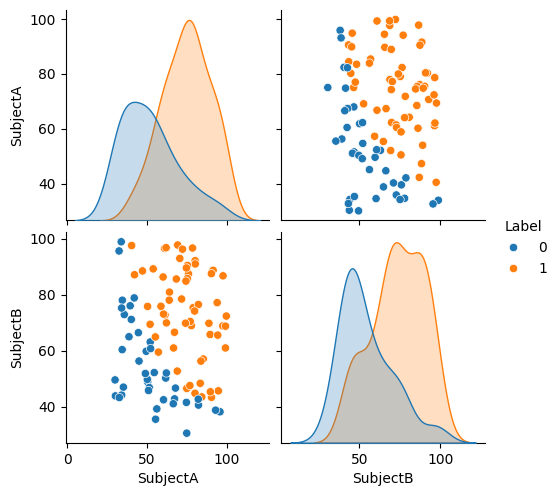

In [98]:
# prompt: pair plot ของ subject A and subject B

import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(data, vars=['SubjectA', 'SubjectB'], hue='Label')
plt.show()


In [99]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [103]:
parameters = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 'C':[1,2,3,4]}

In [104]:
gsCV = GridSearchCV(SVC(), parameters, cv = 5)

In [105]:
gsCV.fit(X,y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 2, 3, 4],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [106]:
gsCV.cv_results_

{'mean_fit_time': array([0.00864644, 0.00330386, 0.00379243, 0.003759  , 0.00821314,
        0.00378385, 0.00383506, 0.00386796, 0.00895953, 0.0029202 ,
        0.00347581, 0.00307722, 0.01172519, 0.00306487, 0.00305548,
        0.00307651]),
 'std_fit_time': array([0.00648454, 0.0003125 , 0.00073169, 0.0003904 , 0.00633   ,
        0.00082302, 0.00093545, 0.00090101, 0.00841841, 0.00019179,
        0.00059861, 0.0001596 , 0.01049714, 0.0002605 , 0.00011884,
        0.0001001 ]),
 'mean_score_time': array([0.00364685, 0.00324378, 0.00283198, 0.0025311 , 0.00273118,
        0.00380049, 0.00291123, 0.00260568, 0.00253806, 0.00218506,
        0.00251851, 0.00243306, 0.00238657, 0.00231557, 0.00264926,
        0.00219808]),
 'std_score_time': array([4.04328613e-04, 5.40967450e-04, 5.37709781e-04, 2.67615160e-04,
        5.73236977e-04, 2.54010235e-03, 7.27598687e-04, 3.28666181e-04,
        3.77696949e-04, 1.55726971e-04, 4.25618784e-04, 3.93500948e-04,
        2.10309676e-04, 2.74031947e-

In [107]:
gsCV.cv_results_['rank_test_score']

array([ 9,  1,  8, 13,  9,  2,  5, 13,  9,  2,  7, 13,  9,  2,  6, 13],
      dtype=int32)

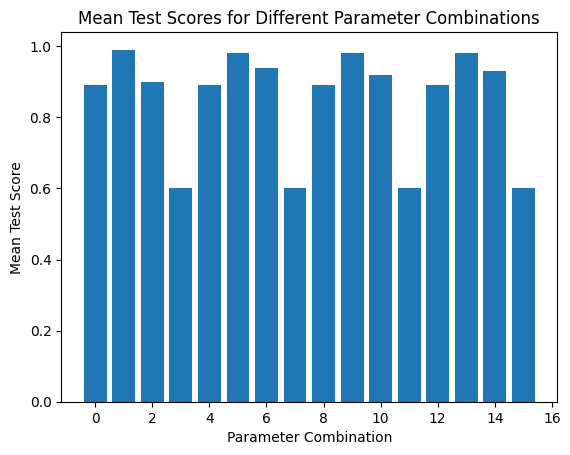

In [109]:
# prompt: plot bar chart gsCV.cv_results_['mean_test_score']

import numpy as np
import matplotlib.pyplot as plt
plt.bar(np.arange(len(gsCV.cv_results_['mean_test_score'])), gsCV.cv_results_['mean_test_score'])
plt.xlabel('Parameter Combination')
plt.ylabel('Mean Test Score')
plt.title('Mean Test Scores for Different Parameter Combinations')
plt.show()


In [110]:
gsCV.cv_results_['mean_test_score']

array([0.89, 0.99, 0.9 , 0.6 , 0.89, 0.98, 0.94, 0.6 , 0.89, 0.98, 0.92,
       0.6 , 0.89, 0.98, 0.93, 0.6 ])

In [111]:
 gsCV.best_score_

np.float64(0.99)

In [112]:
gsCV.best_params_

{'C': 1, 'kernel': 'poly'}

In [114]:
gsCV.best_estimator_.score(X,y)

1.0

In [115]:
gsCV.best_estimator_.predict(X)

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])